In [1]:
import numpy
import scipy.special
import matplotlib.pyplot

In [2]:
class neuralNetwork:
    
    # NN initialize
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        self.lr = learningrate
        
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
            
        # sigmoid activation function
        self.activation_function = lambda x: scipy.special.expit(x)
    
    # training
    def train(self, inputs_list, targets_list):
        # input values to two dimensional array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        ##backpropagation
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
    
    # query
    def query(self, inputs_list):
        # input values to two dimensional array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    

In [3]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

learning_rate = 0.1

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [4]:
# training
training_data_file = open("../input/train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()
del training_data_list[0]

In [5]:
epochs = 5
for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] =0.99
        n.train(inputs, targets)

In [6]:
# test
test_data_file = open("../input/test.csv", 'r')
test_data_list = test_data_file.readlines() 
test_data_file.close()
del test_data_list[0]

0


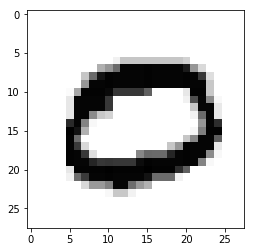

In [7]:
# single value
nnn=1
all_values = test_data_list[nnn].split(',')
image_array = numpy.asfarray(all_values[0:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
rr=n.query((numpy.asfarray(all_values[0:]) / 255.0 * 0.99) + 0.01)
print(numpy.argmax(rr))

In [8]:
# list of predictions
predictions=[]
for record in test_data_list:
    all_values = record.split(',')
    inputs = (numpy.asfarray(all_values[0:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    predictions.append(label)

In [9]:
out_file = open("predictions.csv", "w")
out_file.write("ImageId,Label\n")
for i in range(len(predictions)):
    out_file.write(str(i+1) + "," + str(int(predictions[i])) + "\n")
out_file.close()